In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = pd.read_csv('./datasets/train.csv')

In [82]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [84]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [85]:
category_data = ['Pclass', 'Embarked']

<Axes: >

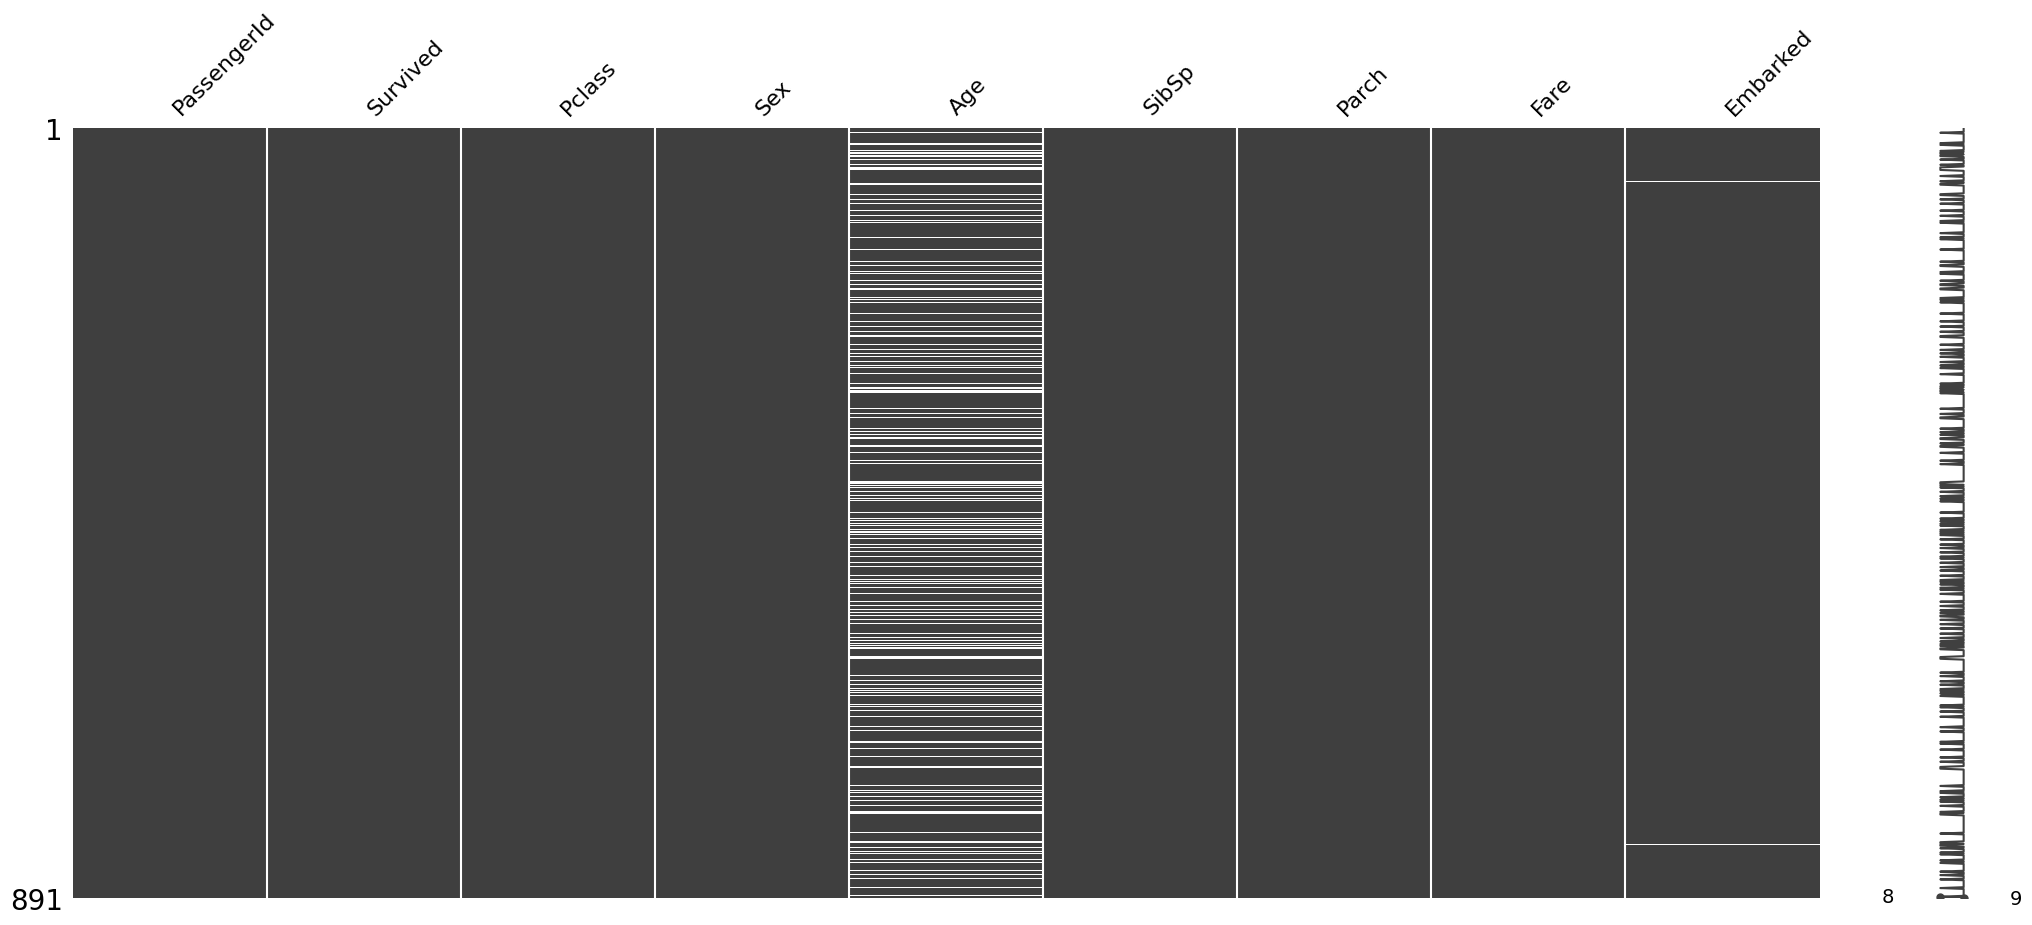

In [86]:
msno.matrix(data)

<Axes: >

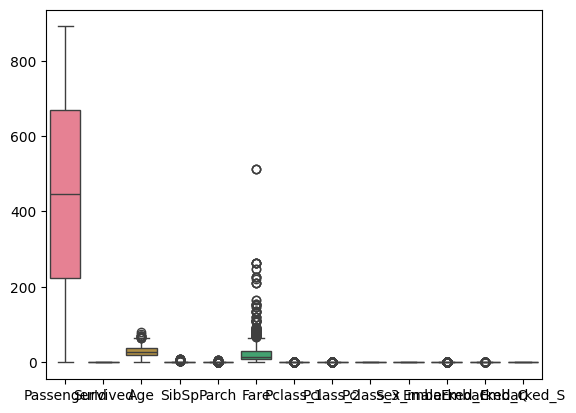

In [103]:
sns.boxplot(data)

<Axes: xlabel='Survived', ylabel='Fare'>

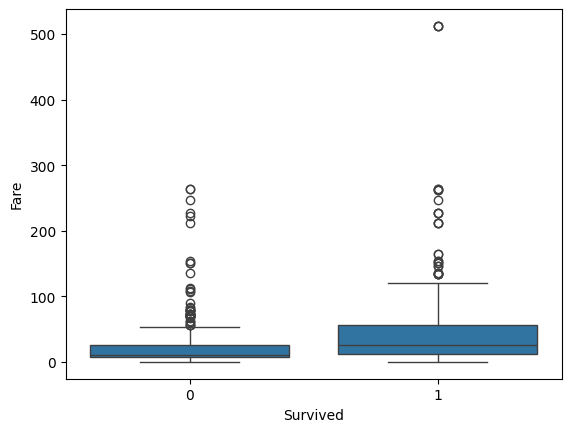

In [88]:
sns.boxplot(x=data['Survived'], y=data['Fare'])

In [89]:
def categorize(__data, columns: list[str]):
    for name in columns:
        __data[name] = __data[name].astype('category')

In [90]:
categorize(data, category_data)

In [91]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [92]:
data = pd.get_dummies(data, dtype=int)

In [93]:
data.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Pclass_1         int64
Pclass_2         int64
Pclass_3         int64
Sex_female       int64
Sex_male         int64
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
dtype: object

In [94]:
data.drop(['Sex_female'], axis=1, inplace=True)

In [95]:
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,1,0,0,1


# 여기부터 다른 프로젝트에서도 사용하기 좋은 것들

In [62]:
def preprocessing(data: pd.DataFrame):
    dataframe=data.copy()
    dataframe.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    category_data = ['Embarked']
    for name in category_data:
        dataframe[name] = dataframe[name].astype('category')
    dataframe = pd.get_dummies(dataframe, dtype=int)
    dataframe.drop(['Sex_female'], axis=1, inplace=True)
    dataframe['IsAgeNull']=data['Age'].apply(lambda x:1 if pd.isna(x) else 0)
    dataframe['Age']=data['Age'].apply(lambda x:0 if pd.isna(x) else x)
    return dataframe

In [63]:
data = pd.read_csv('./datasets/train.csv')

In [64]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data=preprocessing(data)

In [66]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsAgeNull
0,0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,0


<Axes: >

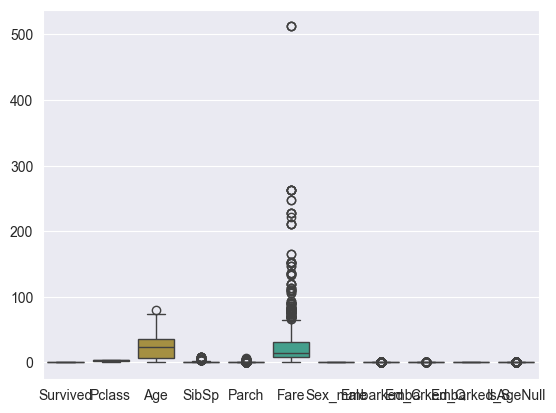

In [67]:
sns.boxplot(data=data)

In [68]:
def remove_out(dataframe, remove_col):
    dff = dataframe.copy()
    for k in remove_col:
        Q1, Q3 = dff.quantile(0.25), dff.quantile(0.75)
        IQR = Q3 - Q1
        rev_range = 1.5  # 제거 범위 조절 변수
        lo, hi = Q1 - (rev_range * IQR), Q3 + (rev_range * IQR)
        dff = dff[(lo[k] < dff[k]) & (dff[k] < hi[k])]
    return dff

In [69]:
removed=remove_out(data, ['Fare'])

<Axes: >

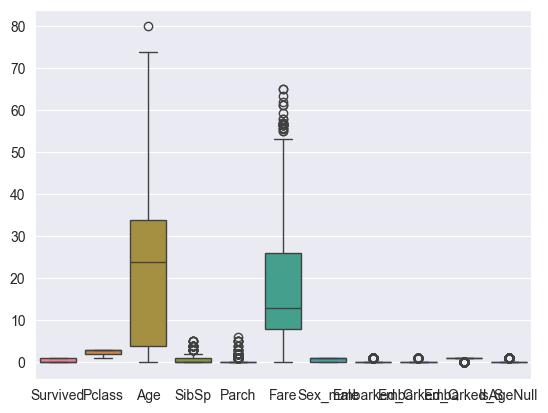

In [70]:
sns.boxplot(data=removed)

In [71]:
removed.shape, data.shape

((775, 11), (891, 11))

In [72]:
data=removed

In [73]:
def match_scale(dataframe:pd.DataFrame, columns:dict[str:int]):
    df=dataframe.copy()
    max_vals=df.max()
    for col in columns.keys():
        df[col]=df[col]/max_vals[col]*columns[col]
    return df

In [74]:
data=match_scale(data, {'Age':2, 'Fare':2, 'Parch':2, 'SibSp':2})

<Axes: >

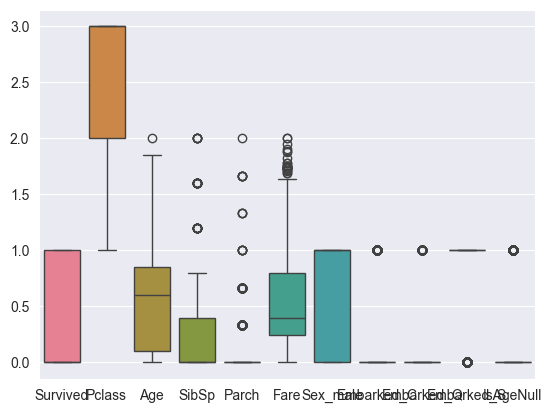

In [75]:
sns.boxplot(data)

In [76]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsAgeNull
0,0,3,0.550,0.4,0.0,0.223077,1,0,0,1,0
2,1,3,0.650,0.0,0.0,0.243846,0,0,0,1,0
3,1,1,0.875,0.4,0.0,1.633846,0,0,0,1,0
4,0,3,0.875,0.0,0.0,0.247692,1,0,0,1,0
5,0,3,0.000,0.0,0.0,0.260255,1,0,1,0,1


In [77]:
data.to_csv('./datasets/__train.csv', index=False)

In [78]:
test=pd.read_csv('./datasets/test.csv')

<Axes: >

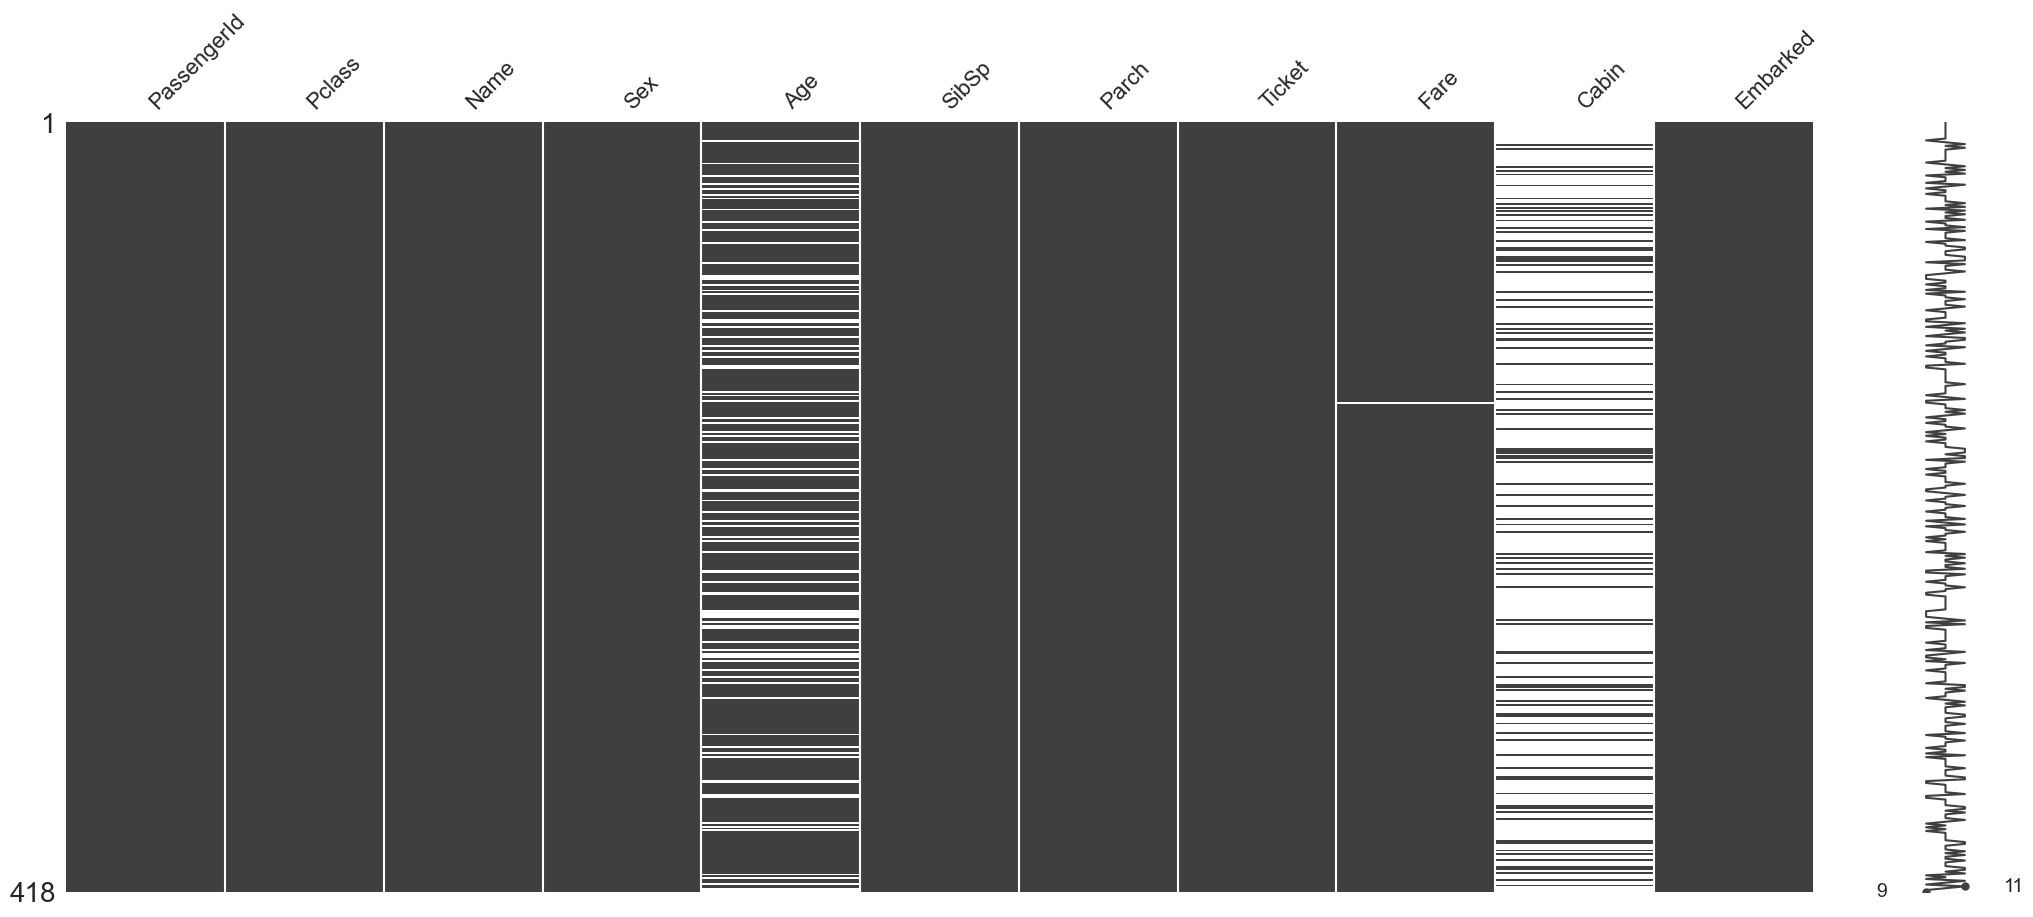

In [79]:
msno.matrix(test)

<Axes: >

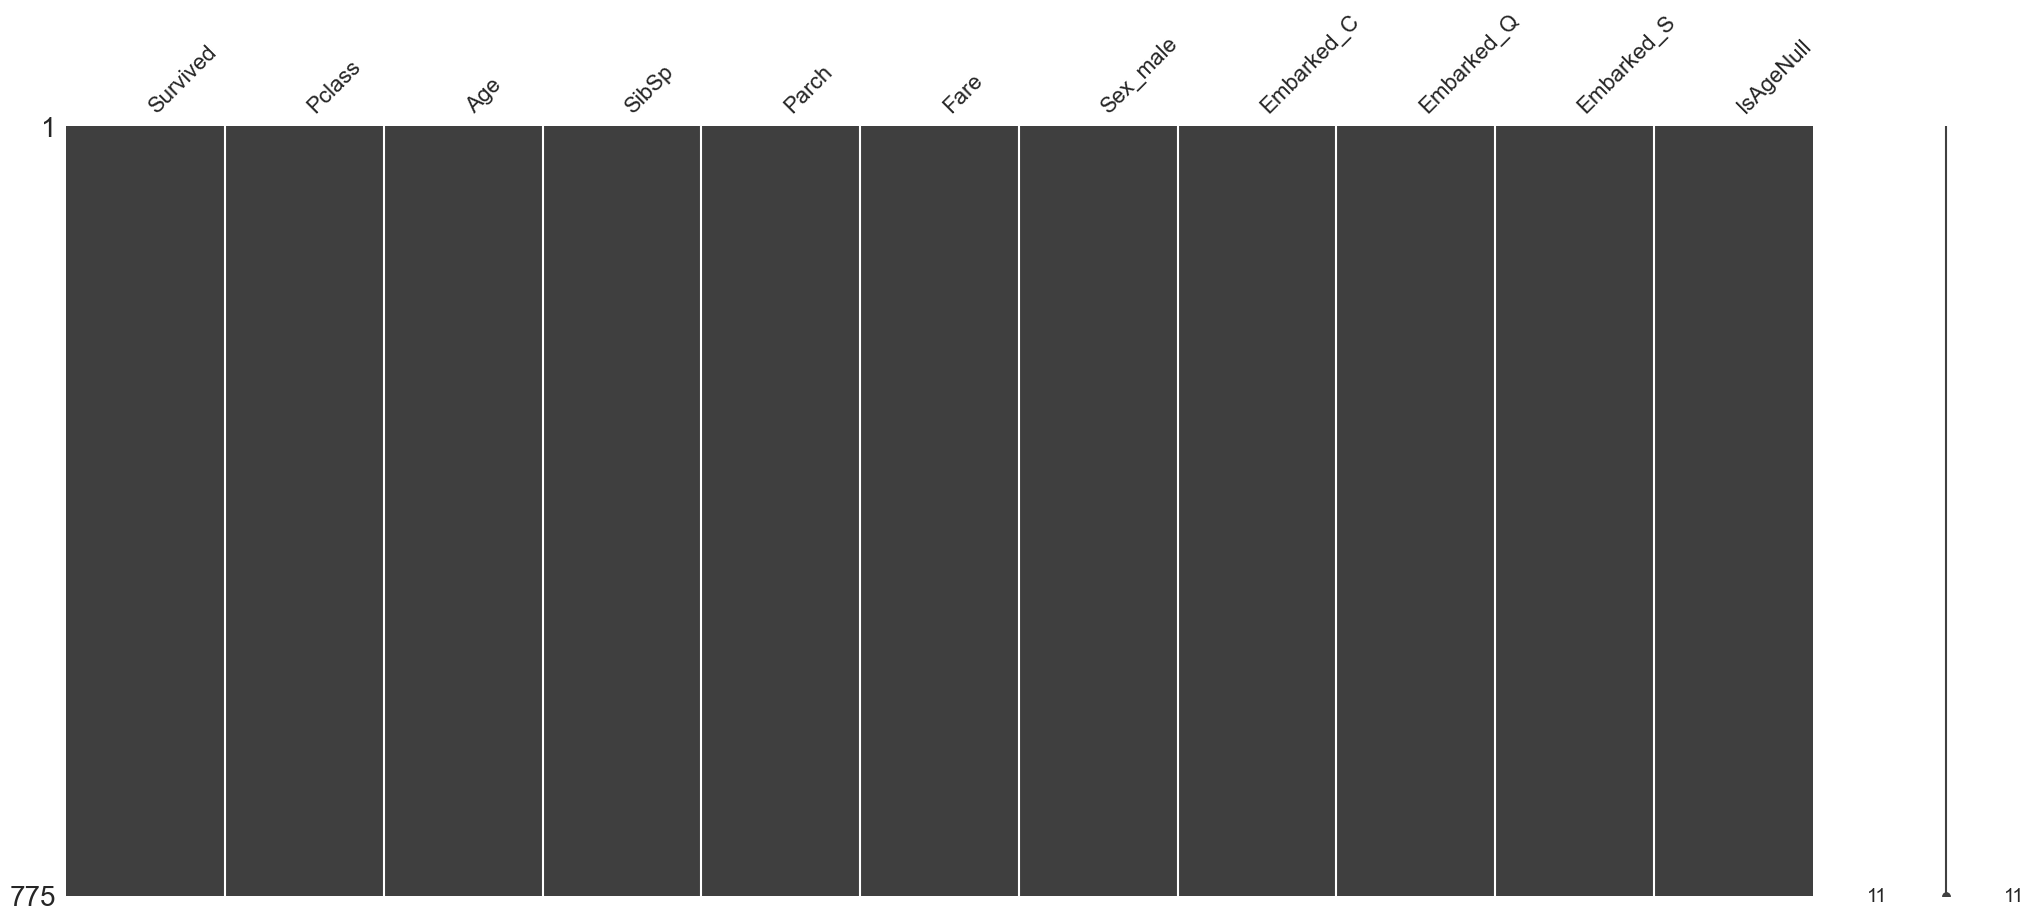

In [80]:
msno.matrix(data)